# BL40A2010 Introduction to IoT-Based Systems

## Assignment 3, 01.02.2023

### Author: Semen Koveshnikov

**(1) Compute the following for a ring topology of $N=5$ and $N=6$  nodes considering that the network in unweighted and the links are directed. The result will give these number as a function of $N$.** ![](./ring.png) *Fig. 1 Example when $N=6$.* 

Answer:

(a) Degree of nodes: For all nodes for ring topologies is $k$=2.
	
(b) Adjacent matrix:

$A_{N=5}=\begin{pmatrix} 
	0 & 1 & 0 & 0 & 1\\
	1 & 0 & 1 & 0 & 0\\
	0 & 1 & 0 & 1 & 0\\
	0 & 0 & 1 & 0 & 1\\
	1 & 0 & 0 & 1 & 0\\
    \end{pmatrix}$

$A_{N=6}=\begin{pmatrix} 
	0 & 1 & 0 & 0 & 0& 1\\
	1 & 0 & 1 & 0 & 0& 0\\
	0 & 1 & 0 & 1 & 0& 0\\
	0 & 0 & 1 & 0 & 1& 0\\
	0 & 0 & 0 & 1 & 0& 1\\
	1 & 0 & 0 & 0 & 1& 0\\
    \end{pmatrix}$

(c) Diameter: $d_{N=5}$=2, $d_{N=6}$=3.

(d) Clustering coefficient of the nodes: For all nodes in ring topologies C=0.





**(2) Use NetworkX to draw and analyze a ring topology with 5 nodes. Verify if the results previously obtained are valid.**

In [80]:
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import scipy as sp
import numpy as np

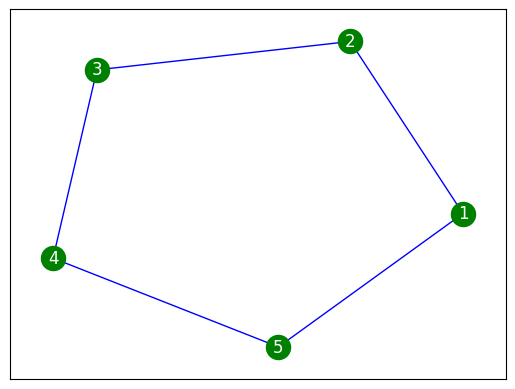

In [81]:
#graph defined and drawn
G=nx.Graph(name="N=5 ring topology graph")
G.add_nodes_from([1,5])
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])
nx.draw_networkx(G,node_color='green',edge_color='blue',font_color='white')
plt.show()

In [82]:
#verification of degree. Yes, k=2 for all
G.degree

DegreeView({1: 2, 5: 2, 2: 2, 3: 2, 4: 2})

In [83]:
#verification of adjacent matrix
A=nx.adjacency_matrix(G)
print(A.todense())
G.nodes() #order of nodes in matrix

[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [0 0 1 0 1]
 [0 1 0 1 0]]


NodeView((1, 5, 2, 3, 4))

In [84]:
#diameter
nx.diameter(G)

2

In [85]:
#clustering
nx.clustering(G)

{1: 0, 5: 0, 2: 0, 3: 0, 4: 0}

**(3) Analyze the ring topology with size 15 ($N=15$) as a communication network (i.e. how data travel to a point to another in the network) based on the node degree, the network diameter and the cluster coefficient.**

Answer:

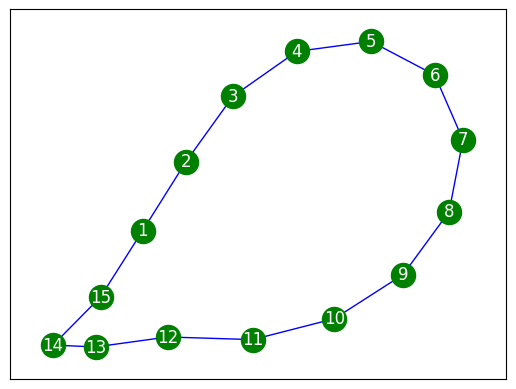

In [86]:
G15=nx.Graph(name="N=15 ring topology graph")
G15.add_nodes_from([1,15])
e=zip(range(1,15),range(2,16))
G15.add_edges_from(e)
G15.add_edges_from([(1,15)])
nx.draw_networkx(G15,node_color='green',edge_color='blue',font_color='white')
plt.show()

In [87]:
G15.degree

DegreeView({1: 2, 15: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2})

In [88]:
A15=nx.adjacency_matrix(G15)
print(A15.todense())

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [89]:
nx.diameter(G15)

7

In [90]:
nx.clustering(G15)

{1: 0,
 15: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0}

The ring topology may be congested for two diametrically opposed nodes, as the load for the links grows with each hope. Each node relays packets not intentioned to it because there are only two direct links to neighbours. Communication with non-neighbouring nodes happens through other nodes. Hence, if there are nodes that poses high rate of data exchange, they should be place as close as possible in the ring. This will lower the link load.

**(4) Consider the ring network from the previous question. The network performance depends on its diameter. As a designer, you can add one new node in the network (and an unlimited number of links that this node is part) . Justify your decision and evaluate how much better the network is. Generalize this finding as a function of $N$.**

*Hint:*  Follow Exercise 1 approach to generalize the finding.

Answer:

As diameter reduction results in network performance improvement, the task is to decrease it. Therefore, connecting this new node to each node in the ring will lower the diameter to $d=2$. The new node will have $N$ links. The improvement of diameter is $d_{old}/d_{new}=$ $\frac{N}{2}$ $\colon$ $2=\frac{N}{4}$. 

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]


NodeView((1, 15, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16))

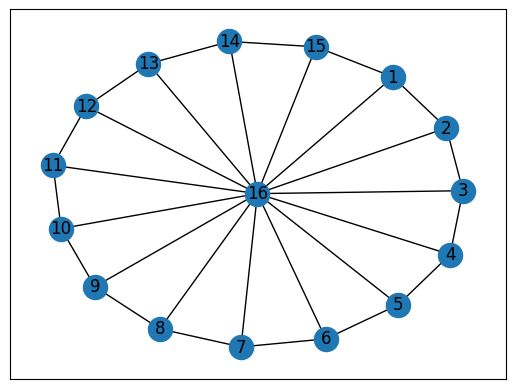

In [117]:
G15.add_node(16)
o=[]
for i in range(8):
    o.append(16)
t=zip(range(1,16,2),o)
G15.add_edges_from(t)
G15.add_edges_from([(16,14),(2,16),(16,4),(5,16),(8,16),(6,16),(12,16),(10,16)])
center=16
edge=set(G15)-{center}
pos=nx.circular_layout(G15.subgraph(edge))
pos[center]=np.array([0,0])
nx.draw_networkx(G15)

A15=nx.adjacency_matrix(G15)
print(A15.todense())
G15.nodes()

In [118]:
nx.diameter(G15)

2